
My ID :170104014$

Last $3$ digits --> 055 

**Dataset Selection**

Now, $55 \% 3 = 1$ and so Dataset 2 was assigned.

**Model**

$(55 + 2) \% 5 = 57 \% 5 = 2$

The assigned model is *Bidirectional LSTM*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/soft computing/Assignment 3/Dataset 2.csv', engine = 'python')

data

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [5]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['text'].value_counts(0))
data

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÂ                                                                                  11
More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÂ â¦                                       4
25-04-18                                                                                                                                                                      4
[Zicutake] Depression can be prevented by exercise  https://goo.gl/fb/Mu7k6tÂ                                                                                                 3
Good morning                                                                                                                                                                  3
                                                                                                                        

,text,polarity
0,"@curious1966 Not sure, depends on who wants a ...",0
1,I'm Forgot all my problems and depression when...,1
2,"i mean, probably he was way more depressed tha...",1
3,naptime. thanx to all of my followers--i just...,0
4,@MentalStrawbery yeah i didn't change it i was...,0
...,...,...
10309,Ewww! Watery tea! The bag should be brewed for...,0
10310,#depression is to feel like crying every time ...,1
10311,@fawfulfan @AEC_PA @AdreanaInLB @MairinMurphy ...,1
10312,Whether you are excited to graduate or nervous...,1


In [6]:
EPOCH = 10

split_val = int(0.2 * data.shape[0])

dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [7]:
print(dataTrain['text'].value_counts())

dataTrain

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÂ                                                                           7
25-04-18                                                                                                                                                              3
More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÂ â¦                               3
Don't settle with #depression, #anxiety or defeat. #Jesus wants you to overcome. #faith #Prayer #bible #kalamazoo http://www.vwcenter.org/fervent-prayer.htmlÂ â¦    2
suffering from chronic depression https://vine.co/v/iu3l2lPBhiKÂ                                                                                                      2
                                                                                                                                                                

,text,polarity
0,"@curious1966 Not sure, depends on who wants a ...",0
1,I'm Forgot all my problems and depression when...,1
2,"i mean, probably he was way more depressed tha...",1
3,naptime. thanx to all of my followers--i just...,0
4,@MentalStrawbery yeah i didn't change it i was...,0
...,...,...
6185,Is anyone joomla-savvyyy? We just need a lil t...,0
6186,Recommend @dcjc Tea Party 2.0 http://tparty2...,0
6187,loving lady G's new song,0
6188,A meta-analysis of 23 peerrun programmes for d...,1


In [8]:
print(dataVal['text'].value_counts())

dataVal

The Stock Market Is Having its Worst Second Quarter Since the Great Depression  http://fortune.com/2018/04/02/stock-market-nyse-worst-second-quarter-depression/Â â¦    2
me and my mates are gunna chekk out a movie next week..i really want to see the boat that rocked.                                                                        1
I just ate so much Taco Bell I'm going to lose 35 pounds. #depression                                                                                                    1
@KarenCivil okay! he just texted me saying that he'd wake up me up lol... if he doesnt I call you at 1PM your time! thx Karen                                            1
Thankful for the people in my life helping me get through this depression. I don't know what I would do without this kind of love and support                            1
                                                                                                                                                 

,text,polarity
6190,Time to take a shower o.o And later iÂ´ll visi...,0
6191,@kierij_ WOW you just have a sample of depress...,1
6192,@theStatus Thanks guys I now have a whole 8 f...,0
6193,Why aren the kardashians the most entertaining...,0
6194,Learning how to forgive myself for the stagnan...,1
...,...,...
8247,"That hard beat of your heart, the endless doub...",1
8248,yes.... yes it is,0
8249,@mrsnasirjones u rdy 2 masterbate hun?? cuz I am,0
8250,just awhile ago me and my dad played wii sport...,0


In [9]:
print(dataTest['text'].value_counts())

dataTest

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÂ                                                                                                                                                                  3
Depression is real                                                                                                                                                                                                                                           2
Good morning                                                                                                                                                                                                                                                 2
Tonight is the Night where it's all Depression naps but No Energy Recovered folks                                                                                                                                                          

,text,polarity
8252,Depression is real,1
8253,@JChidester it's a blessing and a curse. I gl...,0
8254,Onibus com personagem do Tim Burton,0
8255,@hewholovesher hope everything goes good,0
8256,@cM5y_fawkes Your house is famous! didn't you ...,0
...,...,...
10309,Ewww! Watery tea! The bag should be brewed for...,0
10310,#depression is to feel like crying every time ...,1
10311,@fawfulfan @AEC_PA @AdreanaInLB @MairinMurphy ...,1
10312,Whether you are excited to graduate or nervous...,1


In [10]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])


In [11]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2084608   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 512)         788480    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 1024)        4198400   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         557568    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 16)                8768      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 7,637,841
Trainable params: 7,637,841
Non-trainable params: 0
______________________________________________

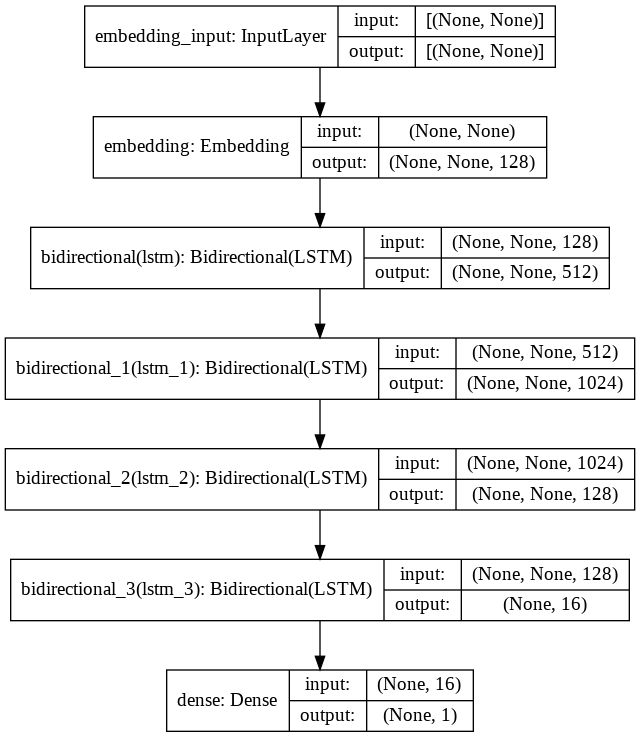

In [12]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.LSTM(256, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(512, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(8, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
194/194 [==============================] - 64s 237ms/step - loss: 0.3119 - accuracy: 0.8822 - val_loss: 0.1899 - val_accuracy: 0.9525
Epoch 2/10
194/194 [==============================] - 43s 220ms/step - loss: 0.1602 - accuracy: 0.9572 - val_loss: 0.2020 - val_accuracy: 0.9486
Epoch 3/10
194/194 [==============================] - 43s 221ms/step - loss: 0.1482 - accuracy: 0.9574 - val_loss: 0.0571 - val_accuracy: 0.9908
Epoch 4/10
194/194 [==============================] - 43s 220ms/step - loss: 0.0212 - accuracy: 0.9979 - val_loss: 0.0425 - val_accuracy: 0.9918
Epoch 5/10
194/194 [==============================] - 43s 220ms/step - loss: 0.0160 - accuracy: 0.9973 - val_loss: 0.0432 - val_accuracy: 0.9893
Epoch 6/10
194/194 [==============================] - 43s 220ms/step - loss: 0.0113 - accuracy: 0.9985 - val_loss: 0.0444 - val_accuracy: 0.9918
Epoch 7/10
194/194 [==============================] - 43s 220ms/step - loss: 0.0068 - accuracy: 0.9994 - val_loss: 0.0462 - val_ac

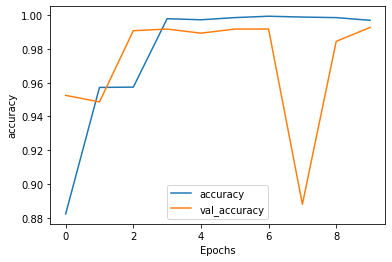

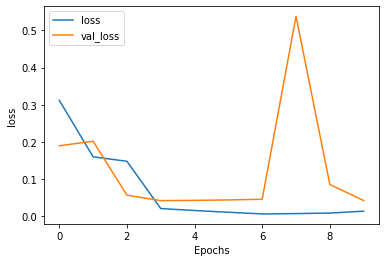


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.882229 	   0.311897 	   0.952473 	   0.189898
       2   0.957189 	   0.160178 	   0.948594 	   0.201996
       3   0.957351 	   0.148153 	   0.990786 	   0.057148
       4   0.997900 	   0.021202 	   0.991756 	   0.042512
       5   0.997254 	   0.015977 	   0.989331 	   0.043191
       6   0.998546 	   0.011259 	   0.991756 	   0.044377
       7   0.999354 	   0.006819 	   0.991756 	   0.046180
       8   0.998869 	   0.007684 	   0.887973 	   0.537753
       9   0.998546 	   0.009134 	   0.984481 	   0.085885
      10   0.996931 	   0.014105 	   0.992725 	   0.042700


In [13]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

### Train Data Performance

194/194 [==============================] - 19s 82ms/step - loss: 0.0080 - accuracy: 0.9990
Train Loss: 0.008008589968085289
Train Accuracy: 0.9990307092666626 (Model Metric)
Train Accuracy: 0.9990306946688207 (sklearn Metric)
Train Precision: 0.9992867332382311
Train Recall: 0.9964438122332859
Train F1-score: 0.9978632478632479


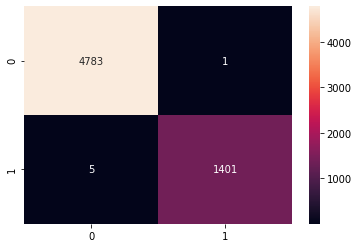

In [ ]:

y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

### Val Data Performance

65/65 [==============================] - 5s 69ms/step - loss: 0.0366 - accuracy: 0.9942
Validation Loss: 0.03659782558679581
Validation Accuracy: 0.9941803812980652 (Model Metric)
Validation Accuracy: 0.9941804073714839 (sklearn Metric)
Validation Precision: 0.9911504424778761
Validation Recall: 0.9824561403508771
Validation F1-score: 0.9867841409691629


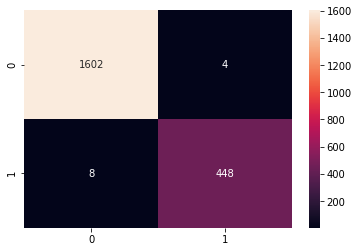

In [ ]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

### Test Data Performance

65/65 [==============================] - 7s 63ms/step - loss: 0.0324 - accuracy: 0.9942
Test Loss: 0.032363008707761765
Test Accuracy: 0.9941803812980652 (Model Metric)
Test Accuracy: 0.9941804073714839 (sklearn Metric)
Test Precision: 0.9932735426008968
Test Recall: 0.9800884955752213
Test F1-score: 0.9866369710467706


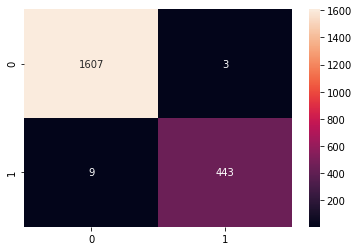

In [ ]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')